## Loading the dataset

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

# Make sure the uploaded file is named kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -p /content -d crawford/emnist


100% 1.23G/1.24G [00:14<00:00, 99.2MB/s]
100% 1.24G/1.24G [00:14<00:00, 94.7MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/emnist.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns

## Splitting the data

In [ ]:
#/kaggle/input/emnist/emnist-letters-mapping.txt
testing_letter = pd.read_csv('/content/emnist-letters-test.csv')
training_letter = pd.read_csv('/content/emnist-letters-train.csv')

In [ ]:
testing_letter

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14794,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [ ]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


## Displaying some images

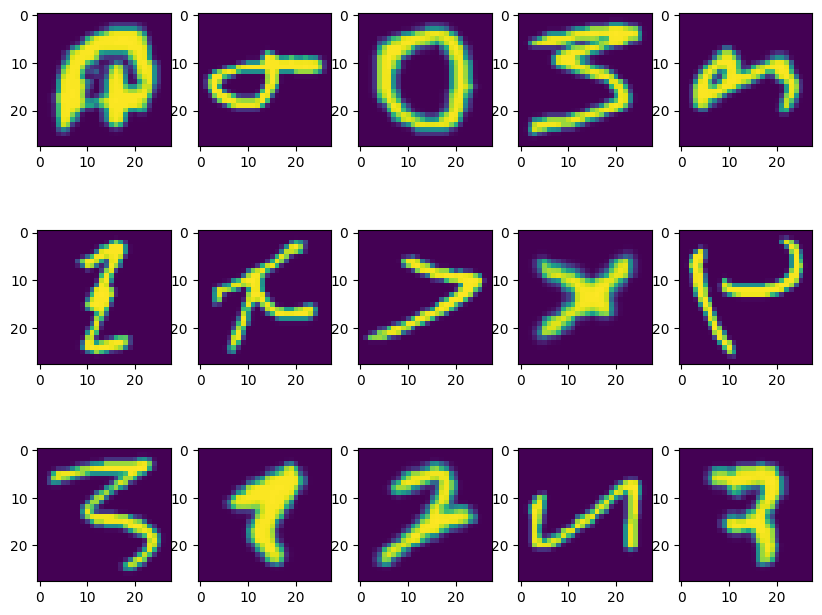

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))


## Normalizing and reshaping the data

In [ ]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)
print(train_images.shape,test_images.shape)

(88799, 28, 28, 1) (14799, 28, 28, 1)


In [ ]:
# Transform labels
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

## Creating the model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [ ]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2,callbacks=[MCP,ES,RLP])

Epoch 1/10
1776/1776 [==============================] - ETA: 0s - loss: 0.6075 - accuracy: 0.8104
Epoch 1: val_accuracy improved from -inf to 0.88021, saving model to Best_points.h5
1776/1776 [==============================] - 123s 69ms/step - loss: 0.6075 - accuracy: 0.8104 - val_loss: 0.3919 - val_accuracy: 0.8802 - lr: 0.0010
Epoch 2/10
   1/1776 [..............................] - ETA: 1:25 - loss: 0.4149 - accuracy: 0.9062

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1776/1776 [==============================] - ETA: 0s - loss: 0.2888 - accuracy: 0.9048
Epoch 2: val_accuracy improved from 0.88021 to 0.89717, saving model to Best_points.h5
1776/1776 [==============================] - 115s 65ms/step - loss: 0.2888 - accuracy: 0.9048 - val_loss: 0.3299 - val_accuracy: 0.8972 - lr: 0.0010
Epoch 3/10
1776/1776 [==============================] - ETA: 0s - loss: 0.2120 - accuracy: 0.9283
Epoch 3: val_accuracy improved from 0.89717 to 0.90055, saving model to Best_points.h5
1776/1776 [==============================] - 115s 65ms/step - loss: 0.2120 - accuracy: 0.9283 - val_loss: 0.3661 - val_accuracy: 0.9005 - lr: 0.0010
Epoch 4/10
1776/1776 [==============================] - ETA: 0s - loss: 0.1666 - accuracy: 0.9408
Epoch 4: val_accuracy improved from 0.90055 to 0.90217, saving model to Best_points.h5
1776/1776 [==============================] - 126s 71ms/step - loss: 0.1666 - accuracy: 0.9408 - val_loss: 0.3741 - val_accuracy: 0.9022 - lr: 0.0010
Epoch 5/1

In [ ]:
model.evaluate(x_test,y_test)

555/555 [==============================] - 9s 17ms/step - loss: 0.3587 - accuracy: 0.9172


[0.3586798310279846, 0.917173445224762]

Text(0, 0.5, 'accuracy')

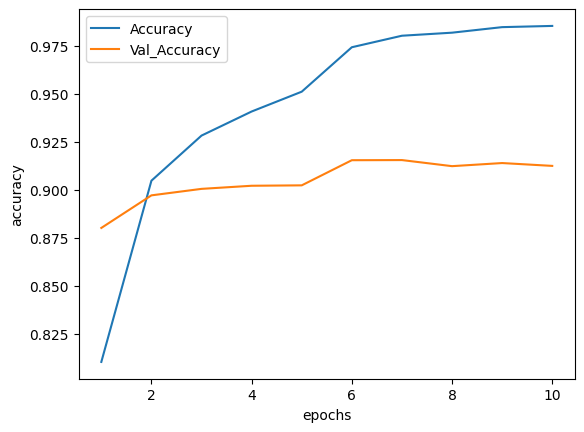

In [ ]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [ ]:
images=x_train[5:10]
labels=y_train[5:10]

In [ ]:
# Read the mapping file
def get_char(index):
  mapping = {}
  with open('/content/emnist-letters-mapping.txt', 'r') as f:
      for line in f:
          parts = line.strip().split(' ')
          label = int(parts[0])
          characters = [chr(int(c)) for c in parts[1:]]
          mapping[label] = characters

  # Convert numeric labels to characters
  numeric_label = index
  characters = mapping.get(numeric_label, [])
  return characters

# print(f"Numeric label {numeric_label} corresponds to characters: {', '.join(characters)}")


1/1 [==============================] - 0s 302ms/step
value of char  ['E', 'e']
1/1 [==============================] - 0s 48ms/step
value of char  ['V', 'v']
1/1 [==============================] - 0s 38ms/step
value of char  ['A', 'a']
1/1 [==============================] - 0s 37ms/step
value of char  ['P', 'p']
1/1 [==============================] - 0s 34ms/step
value of char  ['N', 'n']


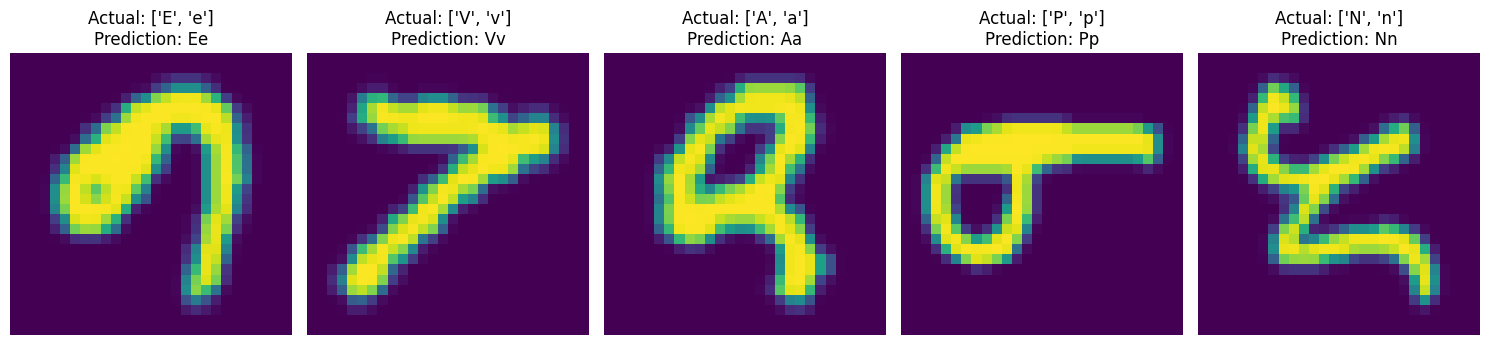

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming images is a list of images and labels is a list of corresponding labels
fig, axes = plt.subplots(1, len(images), figsize=(15, 8))
for i, (image, label) in enumerate(zip(images, labels)):
    expanded_data = np.expand_dims(image, axis=0)
    prediction = model.predict(expanded_data)
    predicted_class_index = np.argmax(prediction)

    # Read the mapping file
    mapping = {}
    with open('/content/emnist-letters-mapping.txt', 'r') as f:
        for line in f:
            parts = line.strip().split(' ')
            label_num = int(parts[0])
            characters = ''.join([chr(int(c)) for c in parts[1:]])
            mapping[label_num] = characters

    # Convert numeric labels to characters
    predicted_characters = mapping.get(predicted_class_index)
    label_key = tuple(label.tolist()) if isinstance(label, np.ndarray) else label

    predicted_class_index = np.argmax(labels[i])
    char = get_char(predicted_class_index)
    print("value of char ", char)

    # Display the image, actual label, and prediction
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(f"Actual: {char}\nPrediction: {predicted_characters}")

plt.tight_layout()
plt.show()
